# PANDAS BASE VI: UNIÓN E INTEGRACIÓN DE DATOS

**Carga de paquetes**

In [ ]:
import pandas as pd
import numpy as np

**Importación de datos**

In [6]:
df = pd.read_csv('../../00_Datasets/DataSetKivaCreditScoring.csv', 
                 sep = ';', index_col = 'id',
                 parse_dates = ['Funded Date','Paid Date'])
df.head(2)

,Funded Date,Funded Amount,Country,Country Code,Loan Amount,Paid Date,Paid Amount,Activity,Sector,Delinquent,Name,Use,Status
id,,,,,,,,,,,,,
84,2005-03-31 06:27:55+00:00,500,Uganda,UG,500,2005-12-13 12:00:40+00:00,500.0,Butcher Shop,Food,False,Justine,"Buy bulls, open a butcher shop",paid
85,2005-03-31 06:27:55+00:00,500,Uganda,UG,500,2005-12-13 12:04:33+00:00,500.0,Food Production/Sales,Food,False,Geoffrey,Buying more produce each time for greater profit,paid


Es muy común que en un proyecto real no partamos de una fuente de datos ya unificada, si no que tengamos varios ficheros origen que tengamos que unir.

Por ejemplo podríamos tener una tabla de ventas por un sitio, otra con los datos de los clientes y otra con los datos de los productos.

O la información de sociodemográficos en un fichero y de la transaccionalidad en otro, etc.

Lo principal es saber los diferentes tipos de "unión" de ficheros que podemos hacer.

Hay 2 grandes formas de hacerlo:

* Si NO existe una variable clave compartida entre los 2 ficheros
* Si SI existe una variable clave compartida entre los 2 ficheros

En el primer caso hablamos de "apilar", y puede ser tanto apilar variables como apilar registros.

En el segudo caso hablamos de "cruzar", y existen varios tipos de cruce, los más importantes son left join, right join, inner join y full join.

Para poder hacer los ejemplos de esta parte necesitamos crear nuevos ficheros a partir de nuestro df, simplemente a modo de fake data:
    
Para los ejemplos de apilar:

1. variables_izq: con la mitad izquierda de las variables y sin identificador
2. variables_drc: con la mitad derecha de las variables y sin identificador
3. registros_sup: con la mitad superior de los registros y sin identificador
4. registros_inf: con la mitad inferior de los registros y sin identificador

Para los ejemplos de cruzar:

5. fichero1: con la mitad izquierda de las variables y CON identificador
6. fichero2: con la mitad derecha de las variables y CON identificador

In [7]:
#Creamos los de apilar
variables_izq = df.iloc[:,:6]
variables_drc = df.iloc[:,6:]

registros_sup = df.iloc[:2573,:]
registros_inf = df.iloc[2573:,:]

In [8]:
#Creamos los de cruzar
#Primero tenemos que crear un campo clave
df2 = df.copy()
df2.insert(0,'Clave',np.arange(0,len(df)))

#Creamos los ficheros
fichero1 = df2.copy().drop(df2.columns[8:],axis = 1)
fichero2 = df2.copy().drop(df2.columns[1:8],axis = 1)

### APILAR VARIABLES

Apilar variables significa que tenemos dos ficheros que tienen los mismos registros, pero diferentes columnas que se complementan y queremos unir

Pero NO tenemos un campo clave, así que es imprescindible que tengan EXACTAMENTE los mismos registros y en EL MISMO ORDEN.

Lo hacemos con concat(), espeficiando axis = 'columns'


* objs: los ficheros a unir pasados como una lista
* axis: 'columns' para apilar variables

In [14]:
#Recordamos variables_izq
variables_izq

,Funded Date,Funded Amount,Country,Country Code,Loan Amount,Paid Date
id,,,,,,
84,2005-03-31 06:27:55+00:00,500,Uganda,UG,500,2005-12-13 12:00:40+00:00
85,2005-03-31 06:27:55+00:00,500,Uganda,UG,500,2005-12-13 12:04:33+00:00
86,2005-03-31 06:27:55+00:00,500,Uganda,UG,500,2005-12-13 12:06:56+00:00
88,2005-03-31 06:27:55+00:00,300,Uganda,UG,300,2005-08-27 07:33:49+00:00
89,2005-03-31 06:27:55+00:00,500,Uganda,UG,500,2005-12-13 12:09:18+00:00
...,...,...,...,...,...,...
5255,2007-03-27 05:41:31+00:00,1000,Ghana,GH,1000,2008-01-10 10:17:02+00:00
5256,2007-03-27 21:58:56+00:00,800,Ghana,GH,800,2008-01-11 10:16:27+00:00
5257,2007-06-02 03:57:56+00:00,1000,Ghana,GH,1000,2008-03-13 10:01:32+00:00


In [15]:
#Recordamos variables_drc
variables_drc

,Paid Amount,Activity,Sector,Delinquent,Name,Use,Status
id,,,,,,,
84,500.0,Butcher Shop,Food,False,Justine,"Buy bulls, open a butcher shop",paid
85,500.0,Food Production/Sales,Food,False,Geoffrey,Buying more produce each time for greater profit,paid
86,500.0,Animal Sales,Agriculture,False,Apollo,Increase number of goats bought and sold each ...,paid
88,300.0,Clothing Sales,Clothing,False,Eunice,Buy used clothing (mutumbe) of higher quality ...,paid
89,500.0,Food Production/Sales,Food,False,Rose,Buying and reselling of produce,paid
...,...,...,...,...,...,...,...
5255,1000.0,Construction,Construction,False,Grace,Working capital,paid
5256,800.0,Food Market,Food,False,Ysutor,Working capital,paid
5257,1000.0,Construction,Construction,False,Abla,Working capital,paid


In [16]:
#apilamos variables
pd.concat([variables_izq,variables_drc], axis = 'columns')

,Funded Date,Funded Amount,Country,Country Code,Loan Amount,Paid Date,Paid Amount,Activity,Sector,Delinquent,Name,Use,Status
id,,,,,,,,,,,,,
84,2005-03-31 06:27:55+00:00,500,Uganda,UG,500,2005-12-13 12:00:40+00:00,500.0,Butcher Shop,Food,False,Justine,"Buy bulls, open a butcher shop",paid
85,2005-03-31 06:27:55+00:00,500,Uganda,UG,500,2005-12-13 12:04:33+00:00,500.0,Food Production/Sales,Food,False,Geoffrey,Buying more produce each time for greater profit,paid
86,2005-03-31 06:27:55+00:00,500,Uganda,UG,500,2005-12-13 12:06:56+00:00,500.0,Animal Sales,Agriculture,False,Apollo,Increase number of goats bought and sold each ...,paid
88,2005-03-31 06:27:55+00:00,300,Uganda,UG,300,2005-08-27 07:33:49+00:00,300.0,Clothing Sales,Clothing,False,Eunice,Buy used clothing (mutumbe) of higher quality ...,paid
89,2005-03-31 06:27:55+00:00,500,Uganda,UG,500,2005-12-13 12:09:18+00:00,500.0,Food Production/Sales,Food,False,Rose,Buying and reselling of produce,paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5255,2007-03-27 05:41:31+00:00,1000,Ghana,GH,1000,2008-01-10 10:17:02+00:00,1000.0,Construction,Construction,False,Grace,Working capital,paid
5256,2007-03-27 21:58:56+00:00,800,Ghana,GH,800,2008-01-11 10:16:27+00:00,800.0,Food Market,Food,False,Ysutor,Working capital,paid
5257,2007-06-02 03:57:56+00:00,1000,Ghana,GH,1000,2008-03-13 10:01:32+00:00,1000.0,Construction,Construction,False,Abla,Working capital,paid


Lo vemos gráficamente:

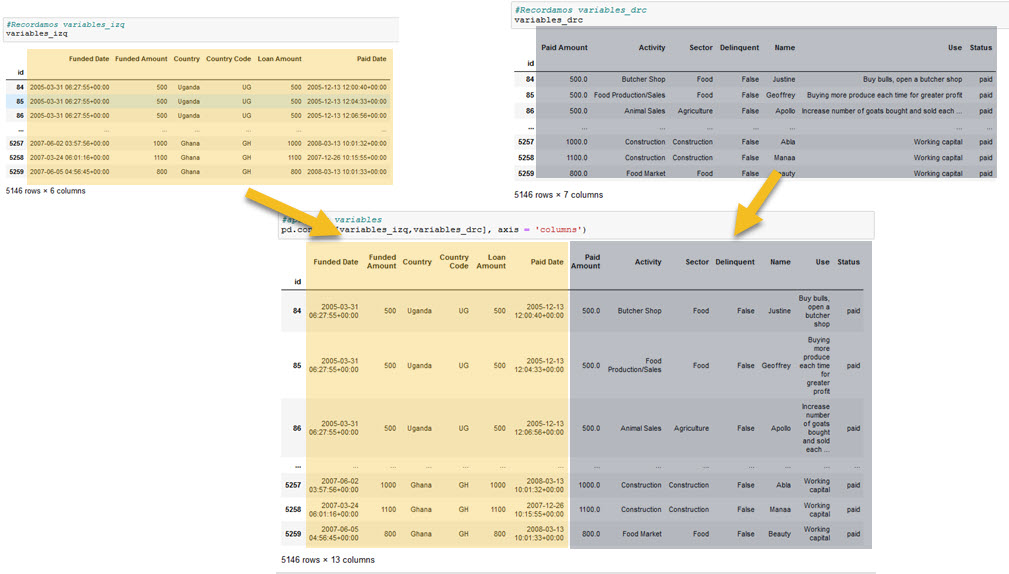

### APILAR REGISTROS

Apilar registros significa que tenemos dos ficheros que tienen las mismas variables, pero diferentes registros que se complementan y queremos unir.

Pero NO tenemos un campo clave, así que es imprescindible que tengan EXACTAMENTE las mismas variables y CON EL MISMO NOMBRE.

Lo hacemos con concat(), espeficiando axis = 'index'


* objs: los ficheros a unir pasados como una lista
* axis: 'index' para apilar registros

In [17]:
#Recordamos registros_sup
registros_sup

,Funded Date,Funded Amount,Country,Country Code,Loan Amount,Paid Date,Paid Amount,Activity,Sector,Delinquent,Name,Use,Status
id,,,,,,,,,,,,,
84,2005-03-31 06:27:55+00:00,500,Uganda,UG,500,2005-12-13 12:00:40+00:00,500.0,Butcher Shop,Food,False,Justine,"Buy bulls, open a butcher shop",paid
85,2005-03-31 06:27:55+00:00,500,Uganda,UG,500,2005-12-13 12:04:33+00:00,500.0,Food Production/Sales,Food,False,Geoffrey,Buying more produce each time for greater profit,paid
86,2005-03-31 06:27:55+00:00,500,Uganda,UG,500,2005-12-13 12:06:56+00:00,500.0,Animal Sales,Agriculture,False,Apollo,Increase number of goats bought and sold each ...,paid
88,2005-03-31 06:27:55+00:00,300,Uganda,UG,300,2005-08-27 07:33:49+00:00,300.0,Clothing Sales,Clothing,False,Eunice,Buy used clothing (mutumbe) of higher quality ...,paid
89,2005-03-31 06:27:55+00:00,500,Uganda,UG,500,2005-12-13 12:09:18+00:00,500.0,Food Production/Sales,Food,False,Rose,Buying and reselling of produce,paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2680,2006-12-30 21:35:14+00:00,2000,Bulgaria,BG,2000,2008-03-08 10:02:56+00:00,2000.0,Food Production/Sales,Food,False,Ignat,To repair his store,paid
2681,2006-12-26 06:22:08+00:00,2000,Bulgaria,BG,2000,2008-03-08 10:02:58+00:00,2000.0,Bakery,Food,False,Todorka,"For a new oven and some products â flour, su...",paid
2682,2006-12-27 19:34:35+00:00,1875,Moldova,MD,1875,2007-11-04 10:17:15+00:00,1875.0,Grocery Store,Food,False,Nicolae,To purchase a new refrigerator and inventory.,paid


In [18]:
#Recordamos registros_inf
registros_inf

,Funded Date,Funded Amount,Country,Country Code,Loan Amount,Paid Date,Paid Amount,Activity,Sector,Delinquent,Name,Use,Status
id,,,,,,,,,,,,,
2685,2006-12-15 23:46:28+00:00,375,Kenya,KE,375,2007-06-30 09:18:31+00:00,375.0,General Store,Retail,False,Shaban,To stock her shop,paid
2686,2007-01-10 06:14:14+00:00,2000,Bulgaria,BG,2000,2008-03-23 10:03:03+00:00,2000.0,Printing,Services,False,Krasimir,To take a smaller bus,paid
2687,2006-12-29 19:59:38+00:00,2000,Bulgaria,BG,2000,2008-03-08 10:02:59+00:00,2000.0,Cattle,Agriculture,False,Ivan,To supply fodder for his cows,paid
2688,2006-12-16 02:42:16+00:00,450,Kenya,KE,450,2007-06-30 09:18:31+00:00,450.0,Clothing Sales,Clothing,False,Regina,To add her stock,paid
2689,2007-01-01 00:59:30+00:00,2000,Bulgaria,BG,2000,2008-03-08 10:03:01+00:00,2000.0,Bakery,Food,False,Radostin,To buy a dough-kneader and two ovens for the b...,paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5255,2007-03-27 05:41:31+00:00,1000,Ghana,GH,1000,2008-01-10 10:17:02+00:00,1000.0,Construction,Construction,False,Grace,Working capital,paid
5256,2007-03-27 21:58:56+00:00,800,Ghana,GH,800,2008-01-11 10:16:27+00:00,800.0,Food Market,Food,False,Ysutor,Working capital,paid
5257,2007-06-02 03:57:56+00:00,1000,Ghana,GH,1000,2008-03-13 10:01:32+00:00,1000.0,Construction,Construction,False,Abla,Working capital,paid


In [19]:
#apilamos registros
pd.concat([registros_sup,registros_inf], axis = 'index')

,Funded Date,Funded Amount,Country,Country Code,Loan Amount,Paid Date,Paid Amount,Activity,Sector,Delinquent,Name,Use,Status
id,,,,,,,,,,,,,
84,2005-03-31 06:27:55+00:00,500,Uganda,UG,500,2005-12-13 12:00:40+00:00,500.0,Butcher Shop,Food,False,Justine,"Buy bulls, open a butcher shop",paid
85,2005-03-31 06:27:55+00:00,500,Uganda,UG,500,2005-12-13 12:04:33+00:00,500.0,Food Production/Sales,Food,False,Geoffrey,Buying more produce each time for greater profit,paid
86,2005-03-31 06:27:55+00:00,500,Uganda,UG,500,2005-12-13 12:06:56+00:00,500.0,Animal Sales,Agriculture,False,Apollo,Increase number of goats bought and sold each ...,paid
88,2005-03-31 06:27:55+00:00,300,Uganda,UG,300,2005-08-27 07:33:49+00:00,300.0,Clothing Sales,Clothing,False,Eunice,Buy used clothing (mutumbe) of higher quality ...,paid
89,2005-03-31 06:27:55+00:00,500,Uganda,UG,500,2005-12-13 12:09:18+00:00,500.0,Food Production/Sales,Food,False,Rose,Buying and reselling of produce,paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5255,2007-03-27 05:41:31+00:00,1000,Ghana,GH,1000,2008-01-10 10:17:02+00:00,1000.0,Construction,Construction,False,Grace,Working capital,paid
5256,2007-03-27 21:58:56+00:00,800,Ghana,GH,800,2008-01-11 10:16:27+00:00,800.0,Food Market,Food,False,Ysutor,Working capital,paid
5257,2007-06-02 03:57:56+00:00,1000,Ghana,GH,1000,2008-03-13 10:01:32+00:00,1000.0,Construction,Construction,False,Abla,Working capital,paid


Gráficamente:

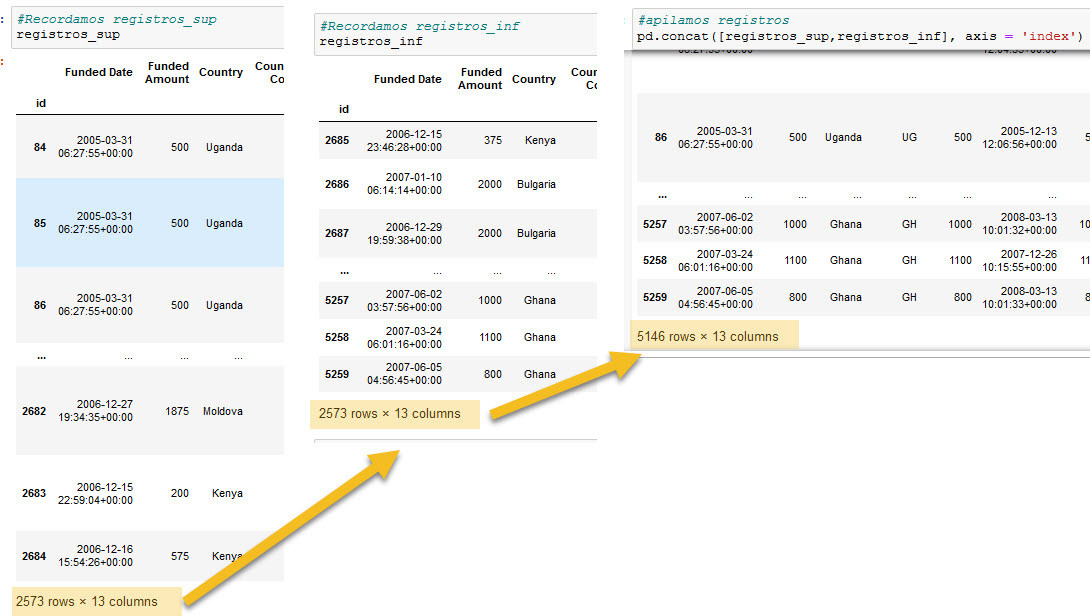

### CRUZAR FICHEROS POR CAMPO CLAVE

Esta suele ser la operación más habitual en entornos profesionales ya que los ficheros muchas veces vienen de tablas de bbdd y éstas suelen tener campos clave.

Se hace con merge().

https://pandas.pydata.org/docs/reference/api/pandas.merge.html

Podemos hacer diferentes tipos de cruce según la tabla que queremos que "mande":

* left join: manda la izquierda, es decir se incluirán todos los registros de la tabla de la izquierda independientemente de que estén o no en la derecha
* rigth join: manda la derecha, es decir se incluirán todos los registros de la tabla de la derecha independientemente de que estén o no en la izquierda
* inner join: solamente se incluirán los registros que estén en ambas tablas
* full join: se incluirán todos los registros tanto los de la izquierda como los de la derecha

Parámetros más importantes:

* left: la tabla de la izquierda
* right: la tabla de la derecha
* how: 'left', 'right', 'inner', 'outer' según lo comentado anteriormente
* on: el nombre del campo clave para unir (si se llama igual en ambas)
* left_on: el nombre del campo clave en la izquierda
* right_on: el nombre del campo clave en la derecha

Verlo con diagramas de Venn ayuda a entender lo que hace cada uno:

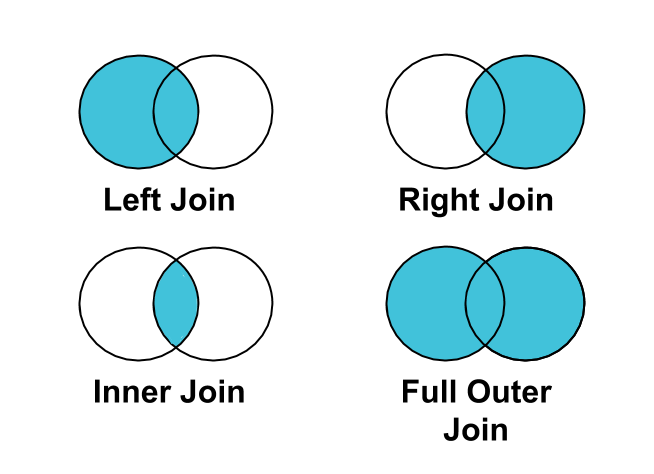

In [20]:
#Recordamos fichero1
fichero1

,Clave,Funded Date,Funded Amount,Country,Country Code,Loan Amount,Paid Date,Paid Amount
id,,,,,,,,
84,0,2005-03-31 06:27:55+00:00,500,Uganda,UG,500,2005-12-13 12:00:40+00:00,500.0
85,1,2005-03-31 06:27:55+00:00,500,Uganda,UG,500,2005-12-13 12:04:33+00:00,500.0
86,2,2005-03-31 06:27:55+00:00,500,Uganda,UG,500,2005-12-13 12:06:56+00:00,500.0
88,3,2005-03-31 06:27:55+00:00,300,Uganda,UG,300,2005-08-27 07:33:49+00:00,300.0
89,4,2005-03-31 06:27:55+00:00,500,Uganda,UG,500,2005-12-13 12:09:18+00:00,500.0
...,...,...,...,...,...,...,...,...
5255,5141,2007-03-27 05:41:31+00:00,1000,Ghana,GH,1000,2008-01-10 10:17:02+00:00,1000.0
5256,5142,2007-03-27 21:58:56+00:00,800,Ghana,GH,800,2008-01-11 10:16:27+00:00,800.0
5257,5143,2007-06-02 03:57:56+00:00,1000,Ghana,GH,1000,2008-03-13 10:01:32+00:00,1000.0


In [21]:
#Recordamos fichero2
fichero2

,Clave,Activity,Sector,Delinquent,Name,Use,Status
id,,,,,,,
84,0,Butcher Shop,Food,False,Justine,"Buy bulls, open a butcher shop",paid
85,1,Food Production/Sales,Food,False,Geoffrey,Buying more produce each time for greater profit,paid
86,2,Animal Sales,Agriculture,False,Apollo,Increase number of goats bought and sold each ...,paid
88,3,Clothing Sales,Clothing,False,Eunice,Buy used clothing (mutumbe) of higher quality ...,paid
89,4,Food Production/Sales,Food,False,Rose,Buying and reselling of produce,paid
...,...,...,...,...,...,...,...
5255,5141,Construction,Construction,False,Grace,Working capital,paid
5256,5142,Food Market,Food,False,Ysutor,Working capital,paid
5257,5143,Construction,Construction,False,Abla,Working capital,paid


In [22]:
#Cruzamos, en este caso tienen exactamente los mismos registros
#Así que daría igual el tipo de unión
pd.merge(left = fichero1,
         right = fichero2,
         how = 'inner',
         on = 'Clave')

,Clave,Funded Date,Funded Amount,Country,Country Code,Loan Amount,Paid Date,Paid Amount,Activity,Sector,Delinquent,Name,Use,Status
0,0,2005-03-31 06:27:55+00:00,500,Uganda,UG,500,2005-12-13 12:00:40+00:00,500.0,Butcher Shop,Food,False,Justine,"Buy bulls, open a butcher shop",paid
1,1,2005-03-31 06:27:55+00:00,500,Uganda,UG,500,2005-12-13 12:04:33+00:00,500.0,Food Production/Sales,Food,False,Geoffrey,Buying more produce each time for greater profit,paid
2,2,2005-03-31 06:27:55+00:00,500,Uganda,UG,500,2005-12-13 12:06:56+00:00,500.0,Animal Sales,Agriculture,False,Apollo,Increase number of goats bought and sold each ...,paid
3,3,2005-03-31 06:27:55+00:00,300,Uganda,UG,300,2005-08-27 07:33:49+00:00,300.0,Clothing Sales,Clothing,False,Eunice,Buy used clothing (mutumbe) of higher quality ...,paid
4,4,2005-03-31 06:27:55+00:00,500,Uganda,UG,500,2005-12-13 12:09:18+00:00,500.0,Food Production/Sales,Food,False,Rose,Buying and reselling of produce,paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5141,5141,2007-03-27 05:41:31+00:00,1000,Ghana,GH,1000,2008-01-10 10:17:02+00:00,1000.0,Construction,Construction,False,Grace,Working capital,paid
5142,5142,2007-03-27 21:58:56+00:00,800,Ghana,GH,800,2008-01-11 10:16:27+00:00,800.0,Food Market,Food,False,Ysutor,Working capital,paid
5143,5143,2007-06-02 03:57:56+00:00,1000,Ghana,GH,1000,2008-03-13 10:01:32+00:00,1000.0,Construction,Construction,False,Abla,Working capital,paid
5144,5144,2007-03-24 06:01:16+00:00,1100,Ghana,GH,1100,2007-12-26 10:15:55+00:00,1100.0,Construction,Construction,False,Manaa,Working capital,paid


In [23]:
#También se podría hacer sobre uno de los 2 ficheros
#Usando merge como método de Series para añadir el segundo
fichero1.merge(right = fichero2,
         how = 'left',
         on = 'Clave')

,Clave,Funded Date,Funded Amount,Country,Country Code,Loan Amount,Paid Date,Paid Amount,Activity,Sector,Delinquent,Name,Use,Status
0,0,2005-03-31 06:27:55+00:00,500,Uganda,UG,500,2005-12-13 12:00:40+00:00,500.0,Butcher Shop,Food,False,Justine,"Buy bulls, open a butcher shop",paid
1,1,2005-03-31 06:27:55+00:00,500,Uganda,UG,500,2005-12-13 12:04:33+00:00,500.0,Food Production/Sales,Food,False,Geoffrey,Buying more produce each time for greater profit,paid
2,2,2005-03-31 06:27:55+00:00,500,Uganda,UG,500,2005-12-13 12:06:56+00:00,500.0,Animal Sales,Agriculture,False,Apollo,Increase number of goats bought and sold each ...,paid
3,3,2005-03-31 06:27:55+00:00,300,Uganda,UG,300,2005-08-27 07:33:49+00:00,300.0,Clothing Sales,Clothing,False,Eunice,Buy used clothing (mutumbe) of higher quality ...,paid
4,4,2005-03-31 06:27:55+00:00,500,Uganda,UG,500,2005-12-13 12:09:18+00:00,500.0,Food Production/Sales,Food,False,Rose,Buying and reselling of produce,paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5141,5141,2007-03-27 05:41:31+00:00,1000,Ghana,GH,1000,2008-01-10 10:17:02+00:00,1000.0,Construction,Construction,False,Grace,Working capital,paid
5142,5142,2007-03-27 21:58:56+00:00,800,Ghana,GH,800,2008-01-11 10:16:27+00:00,800.0,Food Market,Food,False,Ysutor,Working capital,paid
5143,5143,2007-06-02 03:57:56+00:00,1000,Ghana,GH,1000,2008-03-13 10:01:32+00:00,1000.0,Construction,Construction,False,Abla,Working capital,paid
5144,5144,2007-03-24 06:01:16+00:00,1100,Ghana,GH,1100,2007-12-26 10:15:55+00:00,1100.0,Construction,Construction,False,Manaa,Working capital,paid


## EJERCICIOS

### El área de sostenibilidad busca analizar juntos todos los préstamos relacionados con alimentación y agricultura. Combina los registros de los sectores "Food" y "Agriculture" en un único DataFrame para reporte.

In [37]:
food = df[df['Sector'] == 'Food']
agri = df[df['Sector'] == 'Agriculture']

In [39]:
reporte_sostenibilidad = pd.concat([food, agri], axis = 'index')
reporte_sostenibilidad.head(2)

,Funded Date,Funded Amount,Country,Country Code,Loan Amount,Paid Date,Paid Amount,Activity,Sector,Delinquent,Name,Use,Status
id,,,,,,,,,,,,,
84,2005-03-31 06:27:55+00:00,500,Uganda,UG,500,2005-12-13 12:00:40+00:00,500.0,Butcher Shop,Food,False,Justine,"Buy bulls, open a butcher shop",paid
85,2005-03-31 06:27:55+00:00,500,Uganda,UG,500,2005-12-13 12:04:33+00:00,500.0,Food Production/Sales,Food,False,Geoffrey,Buying more produce each time for greater profit,paid


### Finanzas solicita comparar fácilmente el perfil de préstamos pagados vs. morosos en un solo reporte. Crea dos DataFrames: uno con todos los préstamos pagados y otro con todos los morosos, para luego unirlos verticalmente.

In [57]:
pagados = df[df['Status'] == 'paid']
morosos = df[df['Delinquent'] == True]

In [59]:
reporte = pd.concat([pagados, morosos], axis = 'index')
reporte.head(2)

,Funded Date,Funded Amount,Country,Country Code,Loan Amount,Paid Date,Paid Amount,Activity,Sector,Delinquent,Name,Use,Status
id,,,,,,,,,,,,,
84,2005-03-31 06:27:55+00:00,500,Uganda,UG,500,2005-12-13 12:00:40+00:00,500.0,Butcher Shop,Food,False,Justine,"Buy bulls, open a butcher shop",paid
85,2005-03-31 06:27:55+00:00,500,Uganda,UG,500,2005-12-13 12:04:33+00:00,500.0,Food Production/Sales,Food,False,Geoffrey,Buying more produce each time for greater profit,paid


### El comité de riesgos necesita un informe especial combinando solo los siguientes datos para cada préstamo, que han sido preparados por equipos distintos y entregados como tablas separadas, pero en el mismo orden:

- Equipo A: Name, Use, Status

- Equipo B: Paid Amount, Delinquent, Paid Date

In [60]:
equipo_a = df[['Name','Use','Status']]
equipo_b = df[['Paid Amount','Delinquent','Paid Date']]

In [64]:
reporte_comite = pd.concat([equipo_a, equipo_b], axis = 'columns')
reporte_comite.head(2)

,Name,Use,Status,Paid Amount,Delinquent,Paid Date
id,,,,,,
84,Justine,"Buy bulls, open a butcher shop",paid,500.0,False,2005-12-13 12:00:40+00:00
85,Geoffrey,Buying more produce each time for greater profit,paid,500.0,False,2005-12-13 12:04:33+00:00


### Por motivos de privacidad y cumplimiento normativo, el área financiera y el área de impacto social gestionan por separado la información de los préstamos. El área financiera solo tiene acceso a los importes de los préstamos, mientras que el área de impacto maneja variables demográficas y de actividad. Integra la información de ambos departamentos utilizando una clave única para cada préstamo.

Datos de cada una:

- Financiera: Loan Amount, Paid Amount
- Impacto: Country, Activity, Sector


In [84]:
df3 = df.copy()

df3.insert(0, 'Clave', np.arange(len(df)))

financiera = df3[['Clave','Loan Amount','Paid Amount']]
impacto = df3[['Clave','Country','Activity','Sector']]


integrado = pd.merge(left= financiera,
         right= impacto,
         how= 'outer',
         on = 'Clave'
)

integrado.head(2)

,Clave,Loan Amount,Paid Amount,Country,Activity,Sector
0,0,500,500.0,Uganda,Butcher Shop,Food
1,1,500,500.0,Uganda,Food Production/Sales,Food
